In [12]:
import sympy as sy
import numpy as np
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

### Visualize Function

In [13]:
x = list(np.arange(-2,2,0.05))

yValues = []

for i in x:
    yValues.append(math.exp(-abs(i))*math.sin(math.pi*i))

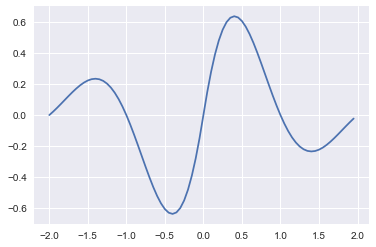

In [14]:
plt.plot(x,yValues)

### Code Network

In [1]:
def simpleModelBackProp(inputsP, targetsY, epochs, numHiddenNuerons, learning_rate = 0.1, print_cost = True):
    
    '''
    A function to compute forward propagation and back propagation steps of a 
    1-S1-1 network updating weights and biases using steepest descent with values 
    randomly initialized from a uniform distribution between -0.5 to 0.5. 
    
    Arguements: 
    - inputsP: vector or matrix of input values
    - targetsY: a vector of target values
    - epochs: number of epochs to train the network
    - numHiddenNuerons: controls the number of nuerons in the S1 layer
    - learning_rate: learning rate for weight updates, set to default of 0.1
    - print_cost: controls whether function outputs cost at various points, defaults to true
    
    Returns:
    - weights: the final weights after all epochs 
    - networkResponses: the predicted values (a2) of the final epoch 
    - squaredError: the MSE for each epoch
    '''
    
    
    import math
    
    def pure_lin(n):
        a = n
        return a 
    
    def log_sig(n):
        a = 1/(1+np.exp(-n))
        return a
        
    W1 = np.random.uniform(-0.5,0.5,numHiddenNuerons)
    b1 = np.random.uniform(-0.5,0.5,numHiddenNuerons)
    W2 = np.random.uniform(-0.5,0.5,numHiddenNuerons)
    b2 = np.random.uniform(-0.5,0.5,1)
    
    print("Initial W1:",[W1], "\n", "Initial W2:",[W2], "\n", "Initial b1:",[b1], "\n", "Initial b2:",[b2])
    squaredError = []

    for i in range(0,epochs):
        networkResponses = []
        errors = []
        for p in inputsP:
            a0 = p
            a1 = log_sig(np.dot(W1,a0)+b1)
            a2 = pure_lin(np.dot(W2,a1)+b2)
            
            error = ((math.exp(-abs(p))*math.sin(math.pi*p))-a2)
            errors.append(error**2)
            
            #backprop 
            d_a1 = (1-a1)*(a1)
            d_a2 = 1
            
            sen2 = -2*d_a2*error
            sen1 = (d_a1)*W2.T*sen2
            
            if i == (epochs -1):
                networkResponses.append(a2)
        
            #Update weights and biases
            W2 = W2 - (learning_rate*sen2*a1.T)
            b2 = b2 - (learning_rate*sen2)

            W1 = W1 - (learning_rate*sen1*a0.T)
            b1 = b1 - (learning_rate*sen1)
        
        #Append MSE for the epoch
        squaredError.append(np.sum(errors)/len(inputsP))
        
        if print_cost == True and i % 1000 == 0:
            print ("Error after epoch %i: %f" % (i, squaredError[i]))

    weights = {"W1":W1,
               "W2":W2,
               "b1":b1,
               "b2":b2 }
    
    return weights,networkResponses,squaredError
    

### Experiment with different values for the learning rate and initial conditions
Discuss the convergence properties of the algorithm as the learning rate changes.

#### S1 = 2 with learning rate of 0.001, 0.01, 0.1

In [49]:
weights_001,networkResponses_001, squaredError_001 = simpleModelBackProp(x,yValues,5000,2, learning_rate=0.001)

Initial W1: [array([ 0.47949979, -0.34269964])] 
 Initial W2: [array([-0.01841688,  0.42521898])] 
 Initial b1: [array([-0.17625021, -0.47251206])] 
 Initial b2: [array([ 0.34022349])]
Error after epoch 0: 0.313732
Error after epoch 1000: 0.111512
Error after epoch 2000: 0.111509
Error after epoch 3000: 0.111507
Error after epoch 4000: 0.111506


In [50]:
weights_1,networkResponses_1, squaredError_1 = simpleModelBackProp(x,yValues,5000,2, learning_rate=0.01)

Initial W1: [array([-0.24528335,  0.09421259])] 
 Initial W2: [array([-0.40441563,  0.49635947])] 
 Initial b1: [array([-0.48557148, -0.14069605])] 
 Initial b2: [array([ 0.23154261])]
Error after epoch 0: 0.129726
Error after epoch 1000: 0.110347
Error after epoch 2000: 0.026976
Error after epoch 3000: 0.007469
Error after epoch 4000: 0.007175


Initial W1: [array([-0.35294531, -0.37712897])] 
 Initial W2: [array([ 0.36160577,  0.04193039])] 
 Initial b1: [array([-0.38617717, -0.33270949])] 
 Initial b2: [array([ 0.08533271])]
Error after epoch 0: 0.032477
Error after epoch 1000: 0.002778
Error after epoch 2000: 0.002638
Error after epoch 3000: 0.002557
Error after epoch 4000: 0.002503


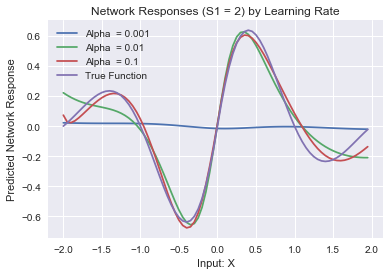

In [51]:
weights,networkResponses, squaredError = simpleModelBackProp(x,yValues,5000,2, learning_rate=0.1)
plt.plot(x,networkResponses_001)
plt.plot(x,networkResponses_1)
plt.plot(x,networkResponses)
plt.plot(x,yValues)
plt.legend(['Alpha  = 0.001', 'Alpha  = 0.01', 'Alpha  = 0.1', 'True Function'])
plt.title('Network Responses (S1 = 2) by Learning Rate')
plt.ylabel("Predicted Network Response")
plt.xlabel("Input: X")
plt.figure(figsize=(40,20))

For the S1 = 2 network, a learning rate of 0.01 or 0.1 appears to be approriate for learning the function, whereas, a network trained with a learning rate of 0.001 (shown in blue) is too small and the network will not converge. 

Both of these networks do a good job approximating the true function, however, the the alpha of 0.1 is likely the best with S1 = 2. 

#### S1 = 10 with learning rate of 0.001, 0.01, 0.1

In [53]:
weights10_001,networkResponses10_001, squaredError10_001 = simpleModelBackProp(x,yValues,5000,10, learning_rate=0.001)

Initial W1: [array([-0.40641926, -0.41772085, -0.17495192, -0.0717139 , -0.06597137,
        0.0620452 , -0.08977009, -0.08341277,  0.19981778, -0.16101297])] 
 Initial W2: [array([ 0.43289617,  0.45354102,  0.39305003, -0.24303074, -0.44959859,
        0.4446956 , -0.19976193, -0.23954496, -0.13855106, -0.09040913])] 
 Initial b1: [array([-0.30429807,  0.18581243,  0.43087983, -0.38033468,  0.06043519,
        0.19192331, -0.43533685,  0.49146556, -0.48145122,  0.43490309])] 
 Initial b2: [array([-0.1129078])]
Error after epoch 0: 0.129002
Error after epoch 1000: 0.111857
Error after epoch 2000: 0.111830
Error after epoch 3000: 0.111811
Error after epoch 4000: 0.111798


In [54]:
weights10_1,networkResponses10_1, squaredError10_1 = simpleModelBackProp(x,yValues,5000,10, learning_rate=0.01)

Initial W1: [array([-0.02552367, -0.43469043, -0.24470406, -0.02088146,  0.33553109,
       -0.13370698, -0.13509612, -0.21892282,  0.03729024, -0.30326752])] 
 Initial W2: [array([-0.25281626, -0.16465126,  0.13072497, -0.38099328,  0.49303891,
        0.37607928, -0.34878581,  0.00351892,  0.06528258, -0.08993886])] 
 Initial b1: [array([-0.474703  , -0.38275744, -0.18779011, -0.01244097,  0.05337844,
        0.09665492, -0.31904795,  0.36475075, -0.45192224, -0.428675  ])] 
 Initial b2: [array([ 0.08239669])]
Error after epoch 0: 0.101273
Error after epoch 1000: 0.018776
Error after epoch 2000: 0.004998
Error after epoch 3000: 0.003620
Error after epoch 4000: 0.002734


Initial W1: [array([ 0.24882652, -0.41688529,  0.36346323,  0.25223906,  0.21588944,
        0.07903077, -0.206348  ,  0.39238032, -0.4347082 ,  0.18650115])] 
 Initial W2: [array([-0.45996747, -0.44942955, -0.35287319, -0.09593176,  0.05647451,
        0.3734616 ,  0.36277438,  0.08479951, -0.44042899, -0.11707615])] 
 Initial b1: [array([-0.43506573,  0.17517569, -0.35373871,  0.3508406 , -0.15975262,
        0.23148345,  0.47691507, -0.11233638,  0.29004636, -0.15940167])] 
 Initial b2: [array([ 0.35359778])]
Error after epoch 0: 0.005530
Error after epoch 1000: 0.000147
Error after epoch 2000: 0.000215
Error after epoch 3000: 0.000095
Error after epoch 4000: 0.000014


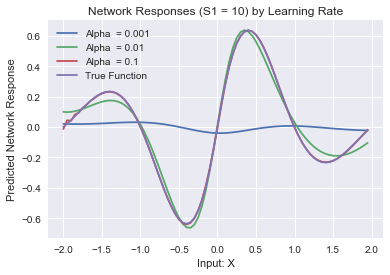

In [55]:
weights10,networkResponses10, squaredError10 = simpleModelBackProp(x,yValues,5000,10, learning_rate=0.1)
plt.plot(x,networkResponses10_001)
plt.plot(x,networkResponses10_1)
plt.plot(x,networkResponses10)
plt.plot(x,yValues)
plt.legend(['Alpha  = 0.001', 'Alpha  = 0.01', 'Alpha  = 0.1', 'True Function'])
plt.title('Network Responses (S1 = 10) by Learning Rate')
plt.ylabel("Predicted Network Response")
plt.xlabel("Input: X")
plt.figure(figsize=(40,20))

For the S1 = 10 network, a learning rate of 0.01 or 0.1 appears to be approriate for learning the function, whereas, a network trained with a learning rate of 0.001 (shown in blue) again is too small and the network will not converge. However, in this case the network does a better job of estimating the function compared to a network with only 2 neurons in the first hidden layer. 

Overall, the network with learning rate of 0.1 and its initial weights seems to approximate the true function the best.

### Check Squared Error for Each Epoch for the S1 = 2 and S1 = 10  Networks

Squared Error for S1 = 2

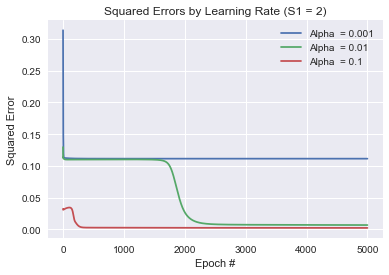

In [52]:
plt.plot(np.arange(0,5000),squaredError_001)
plt.plot(np.arange(0,5000),squaredError_1)
plt.plot(np.arange(0,5000),squaredError)
plt.legend(['Alpha  = 0.001', 'Alpha  = 0.01', 'Alpha  = 0.1'])
plt.title('Squared Errors by Learning Rate (S1 = 2)')
plt.ylabel("Squared Error")
plt.xlabel("Epoch #")
plt.figure(figsize=(40,20))

Squared Error for S1 = 10

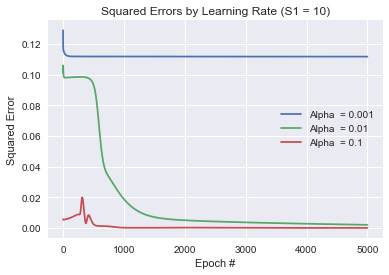

In [56]:
plt.plot(np.arange(0,5000),squaredError10_001)
plt.plot(np.arange(0,5000),squaredError10_1)
plt.plot(np.arange(0,5000),squaredError10)
plt.legend(['Alpha  = 0.001', 'Alpha  = 0.01', 'Alpha  = 0.1'])
plt.title('Squared Errors by Learning Rate (S1 = 10)')
plt.ylabel("Squared Error")
plt.xlabel("Epoch #")
plt.figure(figsize=(40,20))